/tmp/ipykernel_1329392/886611348.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_Z1 = torch.load('/home-sipl/prj7482/estimated_Z_test_sigma_0.01_support_100.pt')


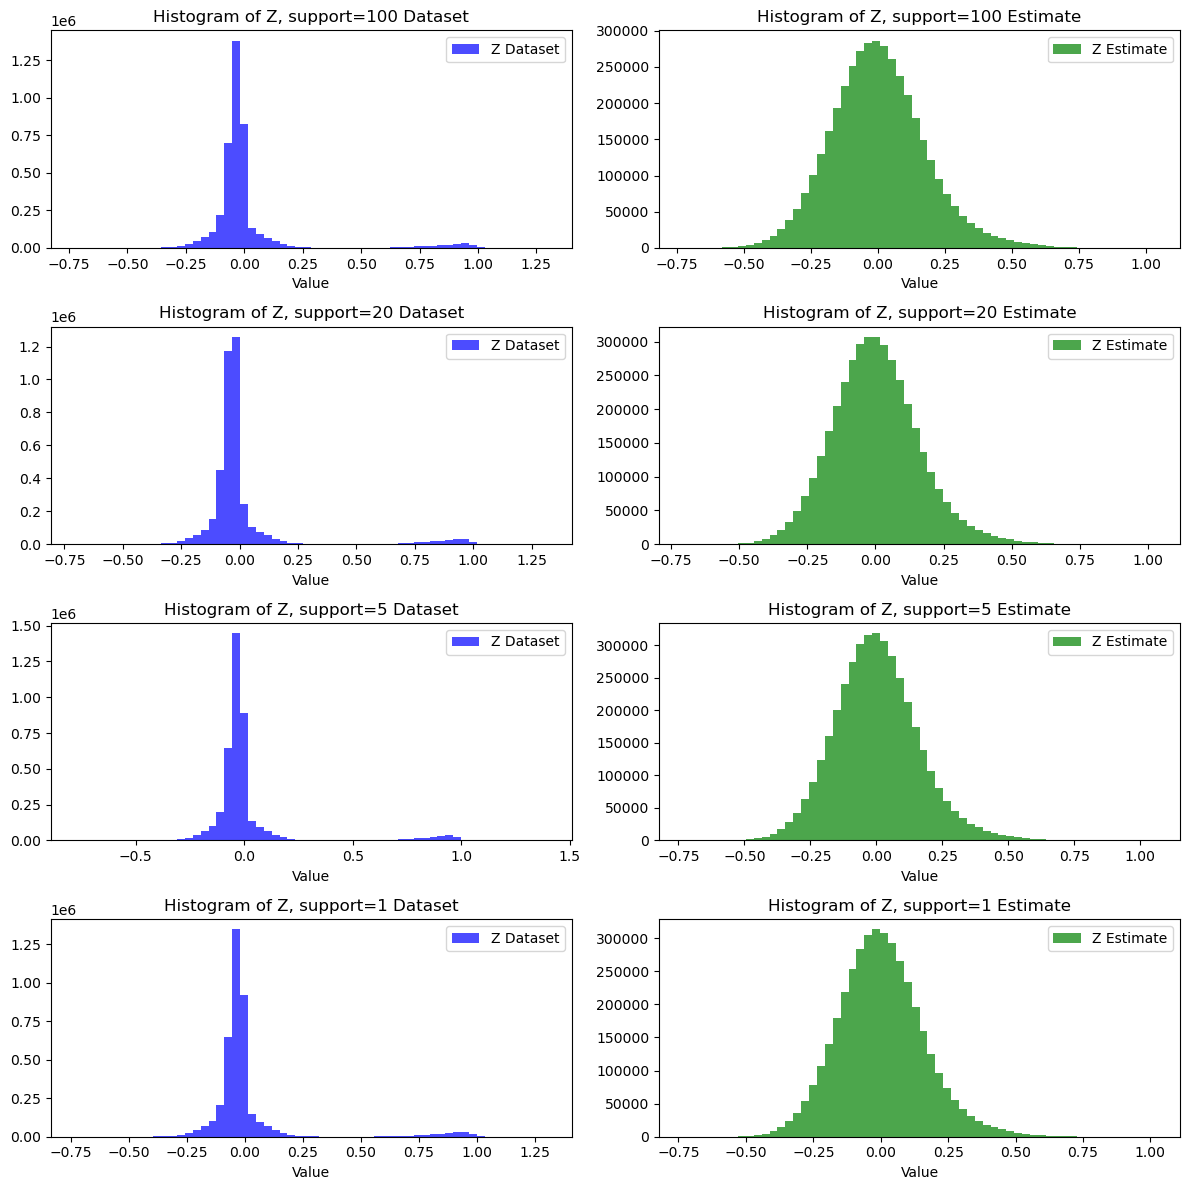

In [1]:
#comparing support!!!

import torch
import matplotlib.pyplot as plt

# Load the data for sigma=0.1
loaded_Z1 = torch.load('/home-sipl/prj7482/estimated_Z_test_sigma_0.01_support_100.pt')
Z_dataset1 = loaded_Z1['dataset_test'].flatten().cpu().numpy() 
Z_estimate1 = loaded_Z1['estimate'].flatten().cpu().numpy()     

# Load the data for sigma=0.02
loaded_Z2 = torch.load('/home-sipl/prj7482/estimated_Z_test_sigma_0.01_support_20.pt')
Z_dataset2 = loaded_Z2['dataset_test'].flatten().cpu().numpy() 
Z_estimate2 = loaded_Z2['estimate'].flatten().cpu().numpy() 

# Load the data for sigma=0.005
loaded_Z3 = torch.load('/home-sipl/prj7482/estimated_Z_test_sigma_0.01_support_5.pt')
Z_dataset3 = loaded_Z3['dataset_test'].flatten().cpu().numpy() 
Z_estimate3 = loaded_Z3['estimate'].flatten().cpu().numpy()     

# Load the data for sigma=0.001
loaded_Z4 = torch.load('/home-sipl/prj7482/estimated_Z_test_sigma_0.01_support_1.pt')
Z_dataset4 = loaded_Z4['dataset_test'].flatten().cpu().numpy() 
Z_estimate4 = loaded_Z4['estimate'].flatten().cpu().numpy()   

# Setting up the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Histogram settings
bin_settings = 60  # Number of bins
alpha_setting = 0.7  # Transparency

# Plot histograms
# Row for Z
axes[0, 0].hist(Z_dataset1, bins=bin_settings, alpha=alpha_setting, color='blue', label='Z Dataset')
axes[0, 0].set_title('Histogram of Z, support=100 Dataset')
axes[0, 1].hist(Z_estimate1, bins=bin_settings, alpha=alpha_setting, color='green', label='Z Estimate')
axes[0, 1].set_title('Histogram of Z, support=100 Estimate')


axes[1, 0].hist(Z_dataset2, bins=bin_settings, alpha=alpha_setting, color='blue', label='Z Dataset')
axes[1, 0].set_title('Histogram of Z, support=20 Dataset')
axes[1, 1].hist(Z_estimate2, bins=bin_settings, alpha=alpha_setting, color='green', label='Z Estimate')
axes[1, 1].set_title('Histogram of Z, support=20 Estimate')


axes[2, 0].hist(Z_dataset3, bins=bin_settings, alpha=alpha_setting, color='blue', label='Z Dataset')
axes[2, 0].set_title('Histogram of Z, support=5 Dataset')
axes[2, 1].hist(Z_estimate3, bins=bin_settings, alpha=alpha_setting, color='green', label='Z Estimate')
axes[2, 1].set_title('Histogram of Z, support=5 Estimate')


axes[3, 0].hist(Z_dataset4, bins=bin_settings, alpha=alpha_setting, color='blue', label='Z Dataset')
axes[3, 0].set_title('Histogram of Z, support=1 Dataset')
axes[3, 1].hist(Z_estimate4, bins=bin_settings, alpha=alpha_setting, color='green', label='Z Estimate')
axes[3, 1].set_title('Histogram of Z, support=1 Estimate')

# Adding legends and labels
for ax in axes.flat:
    ax.legend()
    ax.set_xlabel('Value')
    #ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Ensure the plot is shown
plt.show(block=True)


In [2]:
def calculate_sparsity(data, thresholds):
    sparsity_levels = []
    for threshold in thresholds:
        sparsity = np.sum(data < threshold) / len(data)
        sparsity_levels.append(sparsity)
    return sparsity_levels

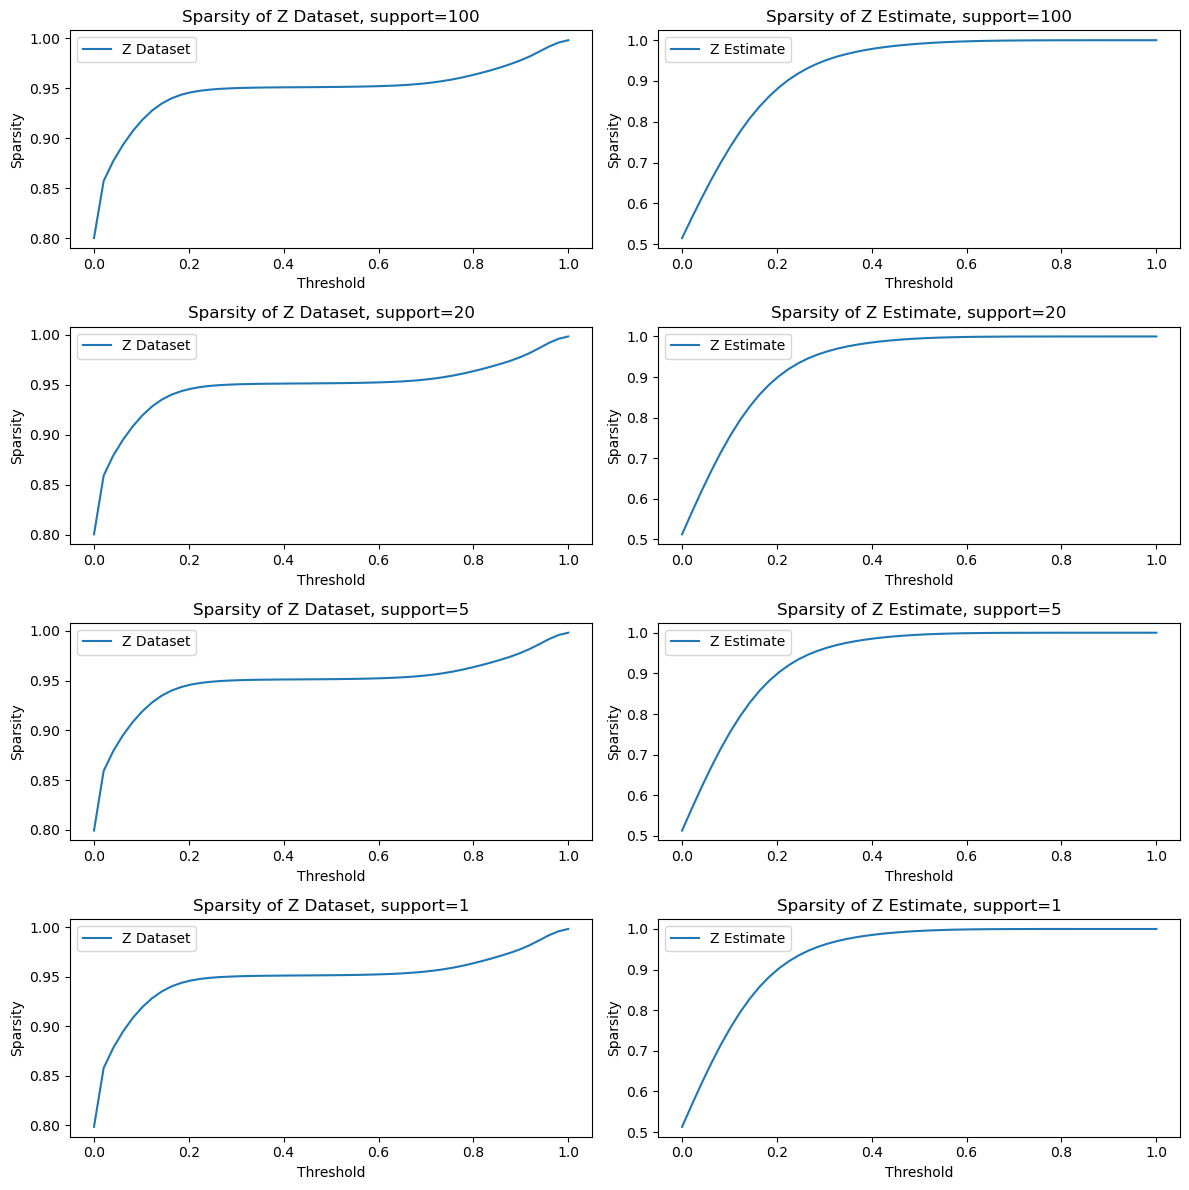

In [3]:
import numpy as np
thresholds = np.linspace(0, 1, num=50)  # Adjust range and resolution of thresholds as needed

# Calculate sparsity for each dataset
Z_dataset_sparsity1 = calculate_sparsity(Z_dataset1, thresholds)
Z_estimate_sparsity1 = calculate_sparsity(Z_estimate1, thresholds)
Z_dataset_sparsity2 = calculate_sparsity(Z_dataset2, thresholds)
Z_estimate_sparsity2 = calculate_sparsity(Z_estimate2, thresholds)
Z_dataset_sparsity3 = calculate_sparsity(Z_dataset3, thresholds)
Z_estimate_sparsity3 = calculate_sparsity(Z_estimate3, thresholds)
Z_dataset_sparsity4 = calculate_sparsity(Z_dataset4, thresholds)
Z_estimate_sparsity4 = calculate_sparsity(Z_estimate4, thresholds)

# Setting up the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(12, 12))  # 4 rows, 2 columns

# Plot sparsity levels
axes[0, 0].plot(thresholds, Z_dataset_sparsity1, label='Z Dataset')
axes[0, 0].set_title('Sparsity of Z Dataset, support=100')
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('Sparsity')

axes[0, 1].plot(thresholds, Z_estimate_sparsity1, label='Z Estimate')
axes[0, 1].set_title('Sparsity of Z Estimate, support=100')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Sparsity')

axes[1, 0].plot(thresholds, Z_dataset_sparsity2, label='Z Dataset')
axes[1, 0].set_title('Sparsity of Z Dataset, support=20')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('Sparsity')

axes[1, 1].plot(thresholds, Z_estimate_sparsity2, label='Z Estimate')
axes[1, 1].set_title('Sparsity of Z Estimate, support=20')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('Sparsity')

axes[2, 0].plot(thresholds, Z_dataset_sparsity3, label='Z Dataset')
axes[2, 0].set_title('Sparsity of Z Dataset, support=5')
axes[2, 0].set_xlabel('Threshold')
axes[2, 0].set_ylabel('Sparsity')

axes[2, 1].plot(thresholds, Z_estimate_sparsity3, label='Z Estimate')
axes[2, 1].set_title('Sparsity of Z Estimate, support=5')
axes[2, 1].set_xlabel('Threshold')
axes[2, 1].set_ylabel('Sparsity')

axes[3, 0].plot(thresholds, Z_dataset_sparsity4, label='Z Dataset')
axes[3, 0].set_title('Sparsity of Z Dataset, support=1')
axes[3, 0].set_xlabel('Threshold')
axes[3, 0].set_ylabel('Sparsity')

axes[3, 1].plot(thresholds, Z_estimate_sparsity4, label='Z Estimate')
axes[3, 1].set_title('Sparsity of Z Estimate, support=1')
axes[3, 1].set_xlabel('Threshold')
axes[3, 1].set_ylabel('Sparsity')

# Adding legends
for ax in axes.flat:
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()